In [9]:
import pandas as pd

# 读取数据
df = pd.read_csv("000001.SZ.csv")
# 将日期设置为索引
df.index = pd.to_datetime(df["trade_date"], format="%Y%m%d")
# 可视化自相关和偏自相关系数
# draw_ac_pac(df["close"], nlags=30)
"""
可见其自相关系数拖尾，偏自相关系数截尾，但其后后置项中也有超过显著区域的，所以可以通过ARMA模型对其进行建模。
另外，从自相关和偏自相关图中可看出原序列是不平稳的，所以需要先对其选择合适的差分次数使其平稳，因此选择了ARIMA模型
"""

from statsmodels.tsa.api import ARIMA
import numpy as np
import matplotlib.pyplot as plt

# 划分训练数据和测试数据
train_data = df["close"][:-10]
test_data = df["close"][-10:]
# 定义全局变量
min_aic = np.inf
best_order = None
best_arima = None
# 遍历范围
counter = 5
# 循环遍历
for i in range(counter):
    for k in range(counter):
        for j in range(counter):
            # try:
            tmp_arima = ARIMA(train_data, order=(i, j, k)).fit()
            tmp_aic = tmp_arima.aic
            if tmp_aic < min_aic:
                min_aic = tmp_aic
                best_order = (i, k, j)
                best_arima = tmp_arima
            # except:
            #     continue
# 输出最优结果
print("order", best_order)
print("para", best_arima.params)

d:\software\python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\software\python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\software\python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\software\python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\s

order (0, 0, 1)
para sigma2    0.085966
dtype: float64


d:\software\python10\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


d:\software\python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\software\python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


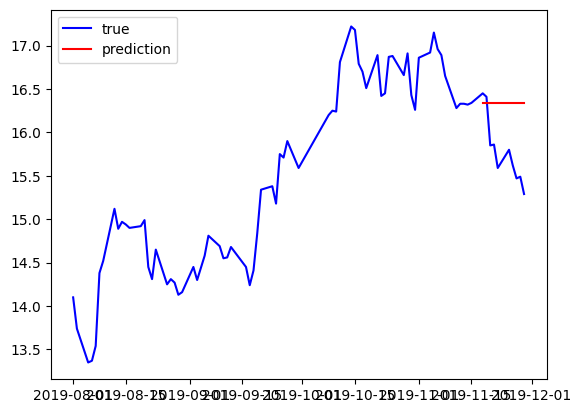

In [10]:
# 预测后10天价格数据
result = best_arima.forecast(10)
predicted = result
index = test_data.index
predicted_df = pd.DataFrame(result.to_list(), index=index)
# 可视化预测值与真实值
fig = plt.figure()
plt.plot(df["close"][-100:], c="blue")
plt.plot(predicted_df, c="red")
plt.legend(["true", "prediction"])
plt.show()

[25.64411162847177,
 25.56472613394942,
 25.595996249093023,
 25.705097374144064,
 25.781498928821687,
 25.74895918925716,
 25.641585257124255,
 25.568134212009213,
 25.601870350288834,
 25.707509206765327]